In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("bengaluru_house_prices.csv")

In [4]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:

df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Deleting column that are not necessary for Machine learning Model

In [6]:
df2=df.drop(["area_type","availability","society","balcony"],axis=1)

### Checking if any column has empty value

In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

### Deleting the empty value columns

In [8]:
df3=df2.dropna()

In [9]:
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


### Making a seperate column of size just to extract no from it

In [10]:
df3["bhk"]=df3["size"].str.split().str[0]

C:\Users\MINHAJ\AppData\Local\Temp\ipykernel_50032\2693065736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"]=df3["size"].str.split().str[0]


In [11]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  object 
dtypes: float64(2), object(4)
memory usage: 724.4+ KB


In [13]:
# Converting bhk from object to int

df3["bhk"]=df3["bhk"].apply(lambda x:int(x))

C:\Users\MINHAJ\AppData\Local\Temp\ipykernel_50032\3119477060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"]=df3["bhk"].apply(lambda x:int(x))


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [15]:
# another way of splitting 

# def splitting(x):
#    x=x.split()
#    return int(x[0])

#df3["bhk"]=df3["size"].apply(splitting)

In [16]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

## we have sqft values like "1133 - 1384" , first we have to figure out how many they are and then taking out average of it

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df3[~df3["total_sqft"].apply(is_float)] # ~ this will give all the opposite answer (not a float in our case)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [19]:
# Writing the function to take out the average between the two numbers

def sft_to_num(x):  
    var=x.split("-")
    if len(var)==2:
        return (float(var[0])+float(var[1]))//2
    try :
        return float(x)
    except:
        return None

In [20]:
df4=df3.copy()

In [21]:
df4["total_sqft"]=df3["total_sqft"].apply(sft_to_num)

In [22]:
# Checking if the function work properly

sft_to_num("2100 - 2850")

2475.0

In [23]:
#checking 12990 value to know if it take out Average

df4.loc[12990]


location      Talaghattapura
size                   3 BHK
total_sqft            2038.0
bath                     3.0
price                  122.0
bhk                        3
Name: 12990, dtype: object

In [24]:
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [25]:
# Adding new feature called price per square feet
# Coverting lakhs to thousands

df4["price_per_sqft"]=(df4["price"]*100000/df4["total_sqft"]).round(2)

In [26]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.83
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.11
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.55
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.34


In [27]:
df4["location"].value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [28]:
df4["location"].nunique()

1304

In [29]:
#Removing any space in locations

def strp(x):
    x=x.strip()
    return x

In [30]:
df5=df4.copy()

In [31]:
df5["location"]=df5["location"].apply(strp)

In [32]:
df5["location"].nunique() #Earlier it was 1304 now 1293 .

1293

In [33]:
grouping=df5.groupby("location")["location"].count().sort_values(ascending=False)
grouping

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [34]:
len(grouping[grouping<=10])

1052

In [35]:
location_less_than_10=grouping[grouping<=10]

In [36]:
location_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [37]:
#Changing to others if any location is less than 10
def check_location(x):
    if x in location_less_than_10:
        return "others"
    else:
        return x

In [38]:
df6=df5.copy()

In [39]:
df6["location"]=df6["location"].apply(check_location)

In [40]:
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.83
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.11
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.55
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.34


In [41]:
df6["location"].nunique() #Earlier it was 1293 now 242 .

242

### Any Bedroom whose size is less than 300 sqft should be remove 

In [42]:
df6[df6["total_sqft"]/df6["bhk"]<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.00
...,...,...,...,...,...,...,...
13277,others,7 Bedroom,1400.0,7.0,218.0,7,15571.43
13279,others,6 Bedroom,1200.0,5.0,130.0,6,10833.33
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.91
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.93


In [43]:
df6.shape

(13246, 7)

In [44]:
df7=df6[~(df6["total_sqft"]/df6["bhk"]<300)]

In [45]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.83
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.11
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.55
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.34


In [46]:
df7["price_per_sqft"].describe()

count     12456.000000
mean       6308.513720
std        4168.123571
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

**The Minimum is 237 and Maximum is 176470 . that has a lot of difference . to build a model we have to remove such extreme cases
so we are going to take between mean and standard deviation**

In [47]:
def remove_pps_outier(df):
    df_out_list=[]
    for key,subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out_list.append(reduced_df)
    df_out=pd.concat(df_out_list,ignore_index=True)
    return df_out

In [48]:
df8=remove_pps_outier(df7)
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.81
...,...,...,...,...,...,...,...
10236,others,2 BHK,1353.0,2.0,110.00,2,8130.08
10237,others,1 Bedroom,812.0,1.0,26.00,1,3201.97
10238,others,3 BHK,1440.0,2.0,63.93,3,4439.58
10239,others,2 BHK,1075.0,2.0,48.00,2,4465.12


In [49]:
df8["price_per_sqft"].describe()  #now we have minimum 1250 and maximum 24509

count    10241.000000
mean      5657.713276
std       2266.473567
min       1250.000000
25%       4244.760000
50%       5172.410000
75%       6426.100000
max      24509.800000
Name: price_per_sqft, dtype: float64

In [50]:
#plotting 2 & 3 bhk sqft and prices

def scatter_plot(df,location):
    bhk2=df[(df["location"]==location) & (df["bhk"]==2)]
    bhk3=df[(df["location"]==location) & (df["bhk"]==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2["total_sqft"],bhk2["price"],label="2 BHK")
    plt.scatter(bhk3["total_sqft"],bhk3["price"],label="3 BHK",marker="+")
    plt.xlabel("Total Square Feet")
    plt.ylabel("Price")
    
    plt.legend()

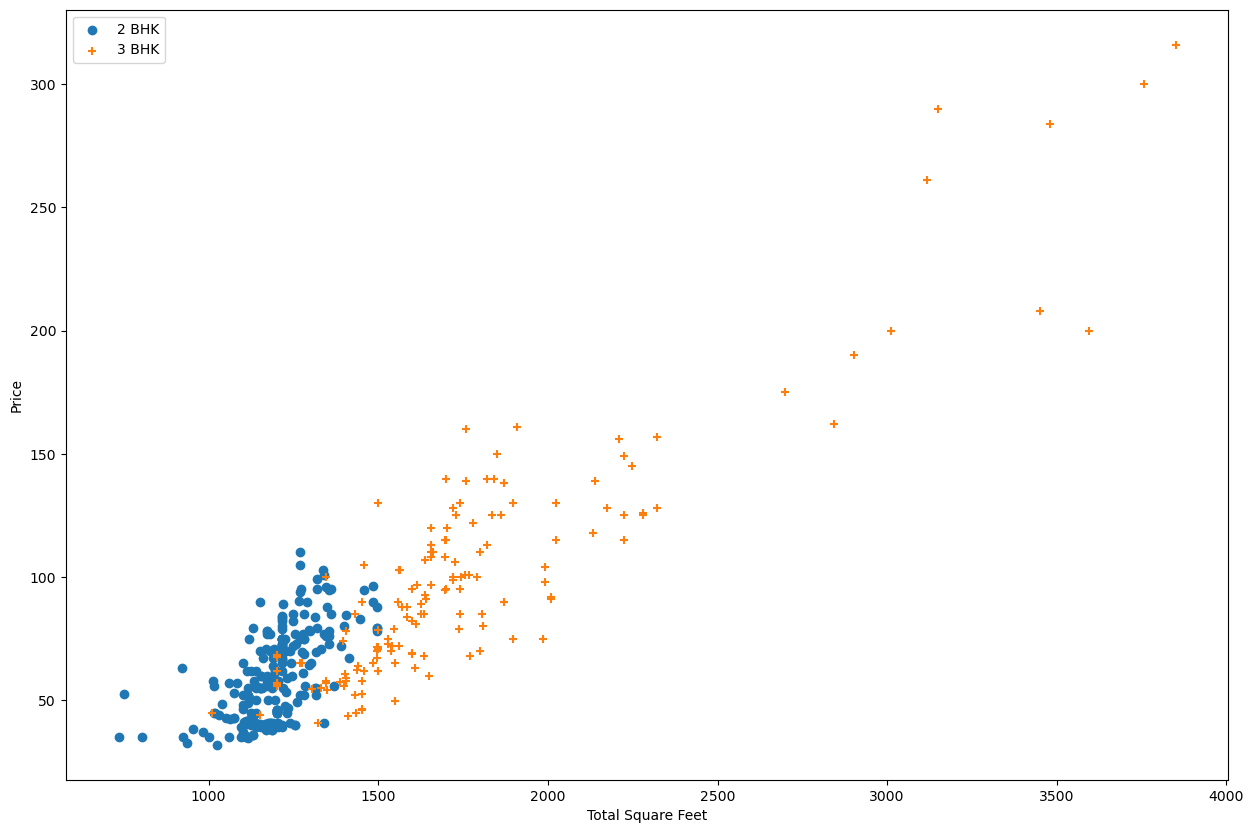

In [51]:
scatter_plot(df8,'Whitefield')

In [52]:
df8["location"].value_counts()

location
others                  2301
Whitefield               479
Sarjapur  Road           296
Electronic City          279
Kanakpura Road           190
                        ... 
Vishveshwarya Layout       4
HAL 2nd Stage              4
Thyagaraja Nagar           4
Vishwapriya Layout         4
Marsur                     3
Name: count, Length: 242, dtype: int64

**Now we are looking into bathroom column**

In [53]:
df8["bath"].value_counts()

bath
2.0     5929
3.0     2620
4.0      677
1.0      614
5.0      235
6.0      107
7.0       27
8.0       17
9.0       10
12.0       3
16.0       1
13.0       1
Name: count, dtype: int64

### Having bathroom more than bedroom is unusual . so cleaning some data

In [54]:
df8[df8["bath"]>=df8["bhk"]+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
36,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,15033.33
37,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,450.0,6,18750.00
530,Arekere,4 BHK,2710.0,6.0,142.0,4,5239.85
580,BTM 2nd Stage,3 Bedroom,1260.0,5.0,185.0,3,14682.54
813,Bannerghatta,4 BHK,3012.0,6.0,250.0,4,8300.13
...,...,...,...,...,...,...,...
9915,others,4 BHK,6652.0,6.0,510.0,4,7666.87
10036,others,2 BHK,600.0,4.0,70.0,2,11666.67
10089,others,3 Bedroom,5656.0,5.0,499.0,3,8822.49
10202,others,4 BHK,6652.0,6.0,660.0,4,9921.83


In [55]:
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.81
...,...,...,...,...,...,...,...
10236,others,2 BHK,1353.0,2.0,110.00,2,8130.08
10237,others,1 Bedroom,812.0,1.0,26.00,1,3201.97
10238,others,3 BHK,1440.0,2.0,63.93,3,4439.58
10239,others,2 BHK,1075.0,2.0,48.00,2,4465.12


In [56]:
df9=df8[df8["bath"]<df8["bhk"]+2]
df9

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.81
...,...,...,...,...,...,...,...
10236,others,2 BHK,1353.0,2.0,110.00,2,8130.08
10237,others,1 Bedroom,812.0,1.0,26.00,1,3201.97
10238,others,3 BHK,1440.0,2.0,63.93,3,4439.58
10239,others,2 BHK,1075.0,2.0,48.00,2,4465.12


# Now we can build our Machine Learning model

In [57]:
df10=df9.drop(["size","price_per_sqft"],axis=1)


In [58]:
df10.head(2)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3


In [59]:
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.00,4
1,1st Block Jayanagar,1630.0,3.0,194.00,3
2,1st Block Jayanagar,1875.0,2.0,235.00,3
3,1st Block Jayanagar,1200.0,2.0,130.00,3
4,1st Block Jayanagar,1235.0,2.0,148.00,2
...,...,...,...,...,...
10236,others,1353.0,2.0,110.00,2
10237,others,812.0,1.0,26.00,1
10238,others,1440.0,2.0,63.93,3
10239,others,1075.0,2.0,48.00,2


In [60]:
x=df10.drop('price',axis=1)

In [61]:
y=df10["price"]

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [63]:
column_trans=make_column_transformer(
    (OneHotEncoder(),["location"]),
    remainder="passthrough")

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

### KNeighbour Regression

In [65]:
from sklearn.neighbors import KNeighborsRegressor

#### putting all the code in single cell to change & check the hyperparameter and run the entire code in single  
###### knn=KNeighborsRegressor(leaf_size=90,n_neighbors=57)
###### knn_pipe=make_pipeline(column_trans,knn)
###### knn_pipe.fit(x_train,y_train)
###### knn_pipe.score(x_test,y_test)

In [66]:
knn=KNeighborsRegressor(leaf_size=90,n_neighbors=55)

In [67]:
knn_pipe=make_pipeline(column_trans,knn)

In [68]:
knn_pipe.fit(x_train,y_train)

C:\Users\MINHAJ\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['location'])])),
                ('kneighborsregressor',
                 KNeighborsRegressor(leaf_size=90, n_neighbors=55))])

In [69]:
knn_pipe.score(x_test,y_test)

0.6816632023780448

### Decision Tree Regression

In [70]:
from sklearn.tree import DecisionTreeRegressor

#### putting all the code in single cell to change & check the hyperparameter and run the entire code in single  

###### dtr=DecisionTreeRegressor(random_state=2 ,max_depth=56 ,min_samples_leaf= 200 ,max_leaf_nodes= 914)
###### dtr_pipe=make_pipeline(column_trans,dtr)
###### dtr_pipe.fit(x_train,y_train)
###### dtr_pipe.score(x_test,y_test)

In [71]:
# The scores chnages when chnaging Value of min_samples_leaf AND max_leaf_nodes

dtr=DecisionTreeRegressor(random_state=10 ,max_depth=10 ,min_samples_leaf= 5 ,max_leaf_nodes= 4)  

In [72]:
dtr_pipe=make_pipeline(column_trans,dtr)

In [73]:
dtr_pipe.fit(x_train,y_train)

C:\Users\MINHAJ\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['location'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=10, max_leaf_nodes=4,
                                       min_samples_leaf=5, random_state=10))])

In [74]:
dtr_pipe.score(x_test,y_test)

0.529500715807637

### Random Forest Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor

#### putting all the code in single cell to change & check the hyperparameter and run the entire code in single  
###### rfg=RandomForestRegressor(random_state= 11 ,min_samples_leaf=6  ,max_features=100)
###### rfg_pipe=make_pipeline(column_trans,rfg)
###### rfg_pipe.fit(x_train,y_train)
###### rfg_pipe.score(x_test,y_test)

In [76]:
rfg=RandomForestRegressor(random_state= 11 ,min_samples_leaf=6  ,max_features=100)

In [77]:
rfg_pipe=make_pipeline(column_trans,rfg)

In [78]:
rfg_pipe.fit(x_train,y_train)

C:\Users\MINHAJ\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['location'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=100, min_samples_leaf=6,
                                       random_state=11))])

In [79]:
rfg_pipe.score(x_test,y_test)

0.7612649253203329

### Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
model=LinearRegression()

In [82]:
model_pipe=make_pipeline(column_trans,model)

In [83]:
model_pipe.fit(x_train,y_train)

C:\Users\MINHAJ\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['location'])])),
                ('linearregression', LinearRegression())])

In [84]:
model_pipe.score(x_test,y_test)

0.7917825589072524

# Linear Regression have the highest score compare to all the others , so we gonna use this

In [85]:
import pickle

In [86]:
with open("House Price Prediction.pkl","wb") as f:
    pickle.dump(model_pipe,f)

In [87]:
cols=["location","total_sqft","bath","bhk"]
model_pipe.predict(pd.DataFrame([["1st Block Jayanagar",2850,4,4]],columns=cols))

array([325.62004999])

In [88]:
def prediction(location,total_sqft,bath,bhk,model=model_pipe):
    cols=["location","total_sqft","bath","bhk"]
    input=pd.DataFrame([[location,total_sqft,bath,bhk]],columns=cols)
    predicted_price=model_pipe.predict(input)
    return (predicted_price)[0].round(2)

In [89]:
prediction("1st Block Jayanagar",2850,4,4,model_pipe)

325.62

In [90]:
# Hyperparameter gridsearch random search
# standard scaler?

In [91]:
!pip list

Package                           Version
--------------------------------- ------------------
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           6.1.3
astropy-iers-data